# load the dataframe

In [4]:
import pandas
import matplotlib
import numpy as np

In [5]:
data = pandas.read_csv("data_small/TG_STAID000001.txt",skiprows=20,parse_dates=["    DATE"])

In [6]:
data

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [7]:
data[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


In [8]:
data.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [9]:
data[["    DATE","   TG"]]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59316,2022-05-27,-9999
59317,2022-05-28,-9999
59318,2022-05-29,-9999
59319,2022-05-30,-9999


# data filteration

In [11]:
data.loc[data["   TG"] != -9999] ["   TG"].mean() / 10

np.float64(6.360787526128467)

In [18]:
data.loc[data["   TG"] != -9999] ["   TG"].max() / 10

np.float64(26.2)

In [19]:
data.loc[data["   TG"] != -9999] ["   TG"].min() / 10

np.float64(-28.8)

<Axes: >

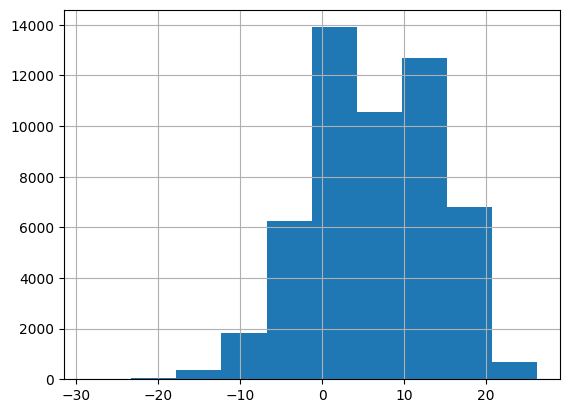

In [21]:
(data.loc[data["   TG"] != -9999] ["   TG"] /10).hist()

# get certain cells

In [28]:
data.loc[data["    DATE"] == "1860-01-05"]["   TG"].squeeze() / 10

np.float64(3.1)

# creating new columns

In [45]:
data["temp0"] = data["   TG"].mask(data["   TG"] == -9999, np.nan)
data

,STAID,SOUID,DATE,TG,Q_TG,temp,temp0
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,NaN


In [46]:
data["temp"] = data["temp0"]/10

In [47]:
data

,STAID,SOUID,DATE,TG,Q_TG,temp,temp0
0,1,35381,1860-01-01,21,0,2.1,21.0
1,1,35381,1860-01-02,46,0,4.6,46.0
2,1,35381,1860-01-03,31,0,3.1,31.0
3,1,35381,1860-01-04,37,0,3.7,37.0
4,1,35381,1860-01-05,31,0,3.1,31.0
...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN


# Plotting

<Axes: >

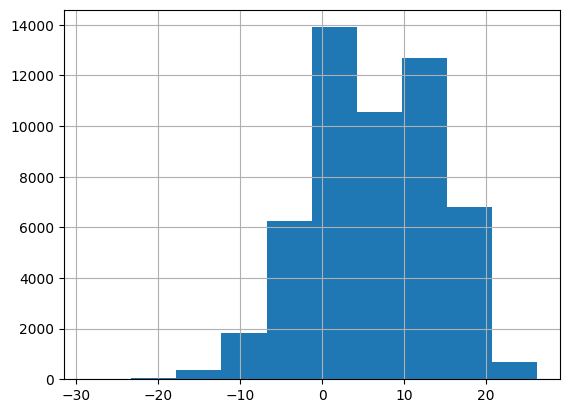

In [49]:
data["temp"].hist()

In [51]:
data.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG', 'temp', 'temp0'], dtype='object')

<Axes: xlabel='    DATE'>

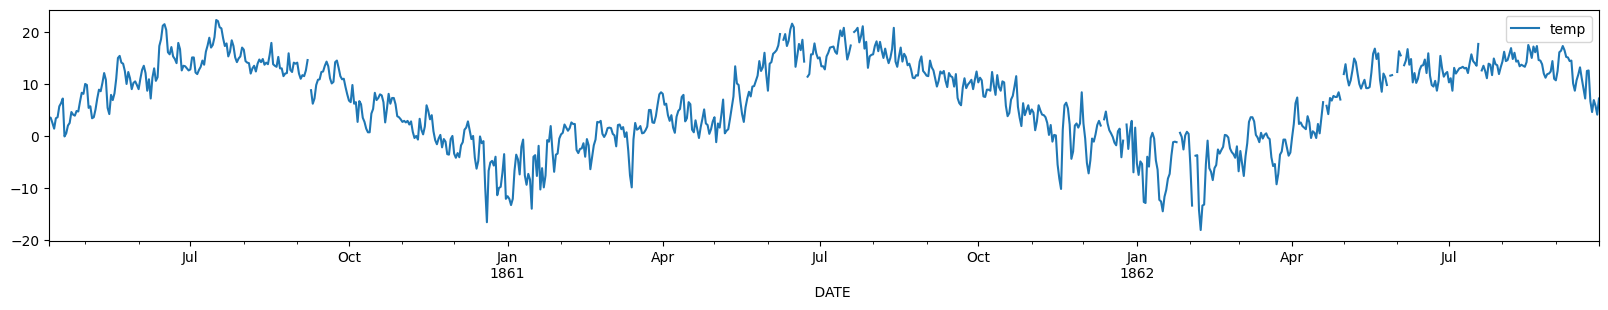

In [56]:
data[100:1000].plot(x="    DATE", y= "temp", figsize = (20,3))